In [15]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
people = np.arange(1,11)
total_cost = np.ones_like(people)*20  #radi niz isti kao people, ali kreira niz jedinica
print(people)
print(total_cost)
# ovo je primjer za kombi iz predavanja

[ 1  2  3  4  5  6  7  8  9 10]
[20 20 20 20 20 20 20 20 20 20]


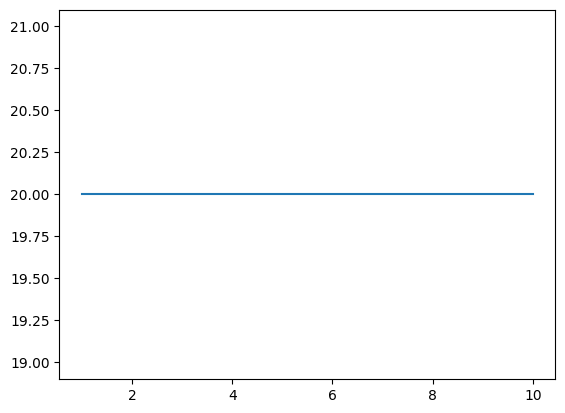

In [3]:
ax = plt.gca()
ax.plot(people, total_cost)

# Koncert

,1,2,3,4,5,6,7,8,9,10
trosak,60,100,140,180,220,260,300,340,380,420


Text(0.5, 0, 'Ljudi')

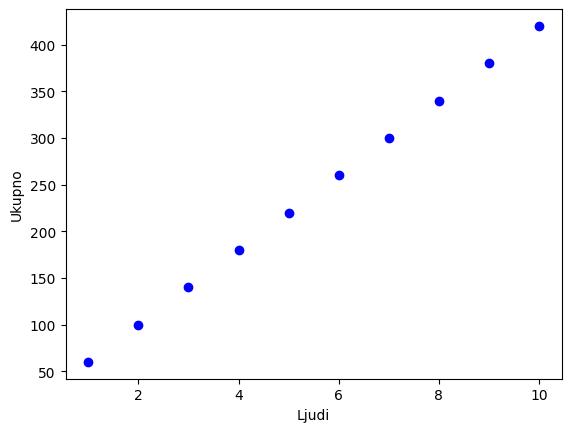

In [5]:
trosak = 40.0 * people + 20.0
display(pd.DataFrame({'trosak': trosak.astype(np.int64)}, index=people).T)
ax = plt.gca()
ax.plot(people, trosak, 'bo')
ax.set_ylabel("Ukupno")
ax.set_xlabel("Ljudi")

In [7]:

def dorada(ax):
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    def make_ticks(lims):
        lwr, upr = sorted(lims)
        lwr = np.round(lwr).astype('int')
        upr = np.round(upr).astype('int')
        if lwr * upr < 0:
            return list(range(lwr, 0)) + list(range(1,upr+1))
        else:
            return list(range(lwr, upr+1))
    import matplotlib.ticker as ticker
    xticks = make_ticks(ax.get_xlim())
    yticks = make_ticks(ax.get_ylim())
    ax.xaxis.set_major_locator(ticker.FixedLocator(xticks))
    ax.yaxis.set_major_locator(ticker.FixedLocator(yticks))
    ax.set_aspect('equal')

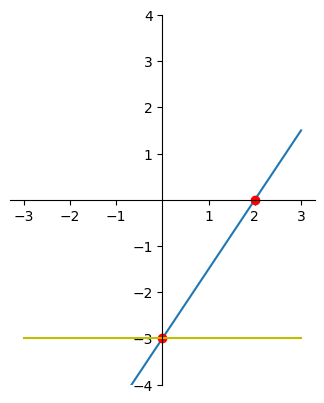

In [8]:
xs = np.linspace(-3,3,100)
a, b = 1.5, -3

ax = plt.gca()
ys = a*xs + b

ax.plot(xs, ys)
ax.set_ylim(-4,4)
dorada(ax)
ax.plot(0, -3, "ro")
ax.plot(2, 0, "ro")
ys = 0 * xs + b
ax.plot(xs, ys, "y")


In [9]:
xs = np.linspace(-3,3,100)
xs_p1 = np.c_[xs, np.ones_like(xs)] ## stupac jedinica
display(pd.DataFrame(xs_p1).head()) ## prikaz df prvih 5 redova


,0,1
0,-3.000000,1.0
1,-2.939394,1.0
2,-2.878788,1.0
3,-2.818182,1.0
4,-2.757576,1.0


In [10]:
w = np.array([1.5, -3])
ys = np.dot(xs_p1, w) ## ovaj pristup je nadogradiv na veliki broj features
display(pd.DataFrame(ys).head())



,0
0,-7.500000
1,-7.409091
2,-7.318182
3,-7.227273
4,-7.136364


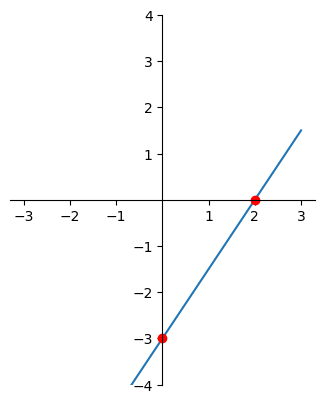

In [11]:
### Crtanje grafa

ax = plt.gca()
ax.plot(xs, ys)
ax.set_ylim(-4, 4)
dorada(ax)
ax.plot(0, -3, "ro")
ax.plot(2, 0, "ro")

## zaključak: dobili smo identičan rezultat, ali korisitili smo drugačiji pristup izračuna
## np.dot() je pristup koji se koristi pri izračunu velikog broja features-a

### Primjer (dodavanje ješ jedne varijable -> piva)

In [12]:
broj_ljudi = np.arange(1,11)
broj_piva = np.arange(0, 20)
print(broj_ljudi)
print(broj_piva)

[ 1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
broj_ljudi, broj_piva = np.meshgrid(broj_ljudi, broj_piva)
ukupno = 40 + broj_ljudi + 5 * broj_piva + 20
#print(broj_ljudi)
#print(broj_piva)

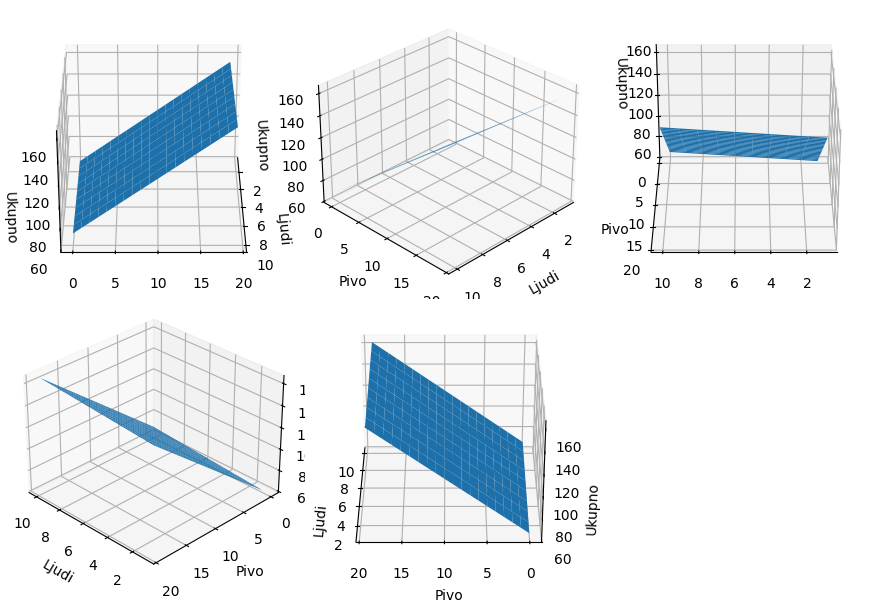

In [16]:
fig,axes = plt.subplots(2,3, subplot_kw={'projection':'3d'}, figsize=(9,6))
kutevi=[0,45,90,135,180]
for ax,angle in zip(axes.flat, kutevi):
    ax.plot_surface(broj_ljudi, broj_piva, ukupno)
    ax.set_xlabel("Ljudi")
    ax.set_ylabel("Pivo")
    ax.set_zlabel("Ukupno")
    ax.azim=angle
axes.flat[-1].axis('off')
fig.tight_layout()


# Nelinearnost

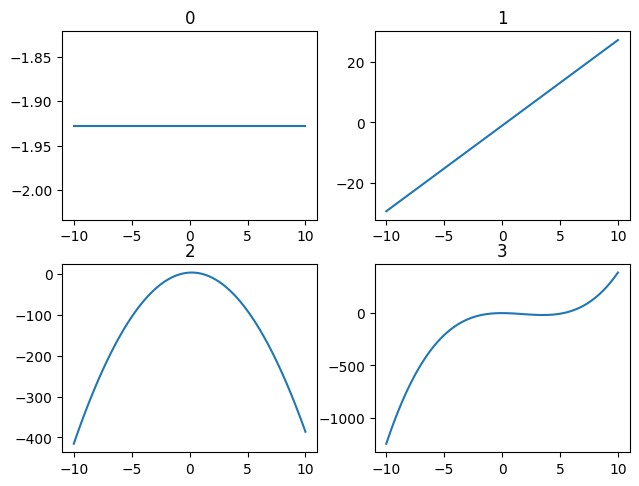

In [17]:
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
titles= ['$0$', '$1$', '$2$', '$3$']
xs = np.linspace(-10, 10, 100)
for power, (ax, title) in enumerate(zip(axes.flat, titles), 1):
  coeffs = np.random.uniform(-5,5, power)
  poly = np.poly1d(coeffs)
  ax.plot(xs, poly(xs))
  ax.set_title(title)

### Parabola

[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]
[174.   166.68 159.52 152.52 145.68 139.   132.48 126.12 119.92 113.88
 108.   102.28  96.72  91.32  86.08  81.    76.08  71.32  66.72  62.28
  58.    53.88  49.92  46.12  42.48  39.    35.68  32.52  29.52  26.68
  24.    21.48  19.12  16.92  14.88  13.    11.28   9.72   8.32   7.08
   6.     5.08   4.32   3.72   3.28   3.     2.88   2.92   3.12   3.48
   4.     4.68   5.52   6.52   

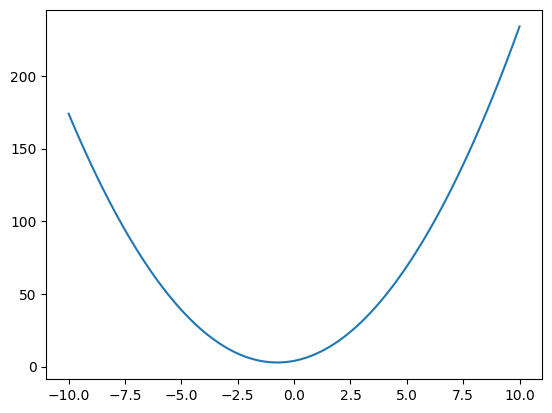

In [21]:
plt.Figure((2,1.5))
xs=np.linspace(-10,10,101)
print(xs)
coeffs=np.array([2,3,4])
ys=np.dot(coeffs, [xs**2,xs**1,xs**0])
print(ys)
plt.plot(xs,ys)

# Numpy i matematika

In [22]:
jedinice_vektor = np.arange(5)
print(jedinice_vektor)
print("Umnozak", np.dot(jedinice_vektor, jedinice_vektor))

[0 1 2 3 4]
Umnozak 30


In [23]:
vektor_red = np.arange(5).reshape(1,5)
print(vektor_red)

[[0 1 2 3 4]]


In [24]:
vektor_stupac = np.arange(0,50, 10).reshape(5,1)
print(vektor_stupac)

[[ 0]
 [10]
 [20]
 [30]
 [40]]


In [25]:
print(np.dot(vektor_red, vektor_stupac))

[[300]]


In [26]:
print(np.dot(vektor_stupac, vektor_red))

[[  0   0   0   0   0]
 [  0  10  20  30  40]
 [  0  20  40  60  80]
 [  0  30  60  90 120]
 [  0  40  80 120 160]]


### Numpy i matematika 2D u 1D

In [28]:
vektor_red = np.arange(5).reshape(1,5)
vektor_stupac = np.arange(5).reshape(5,1)
print(vektor_red)
print(vektor_stupac)
print(np.dot(vektor_red, vektor_stupac)) # 1, 5 * 5, 1 - 1*1 = 1
print(np.dot(vektor_stupac, vektor_red)) # 5, 1 * 1, 5 - 5*5 = 25

[[0 1 2 3 4]]
[[0]
 [1]
 [2]
 [3]
 [4]]
[[30]]
[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]]


False

# Problem s pomičnim zarezom

In [31]:
1.1+2.2==3.3 ## ovo vraća false
np.allclose(1.1+2.2,3.3) ## true ako su brojevi blizu

True

# Primjer - IRIS

In [32]:
from sklearn import datasets
import seaborn as sns

In [35]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target ## učitavamo stupac
#print(iris_df)

display(pd.concat([iris_df.head(3), iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


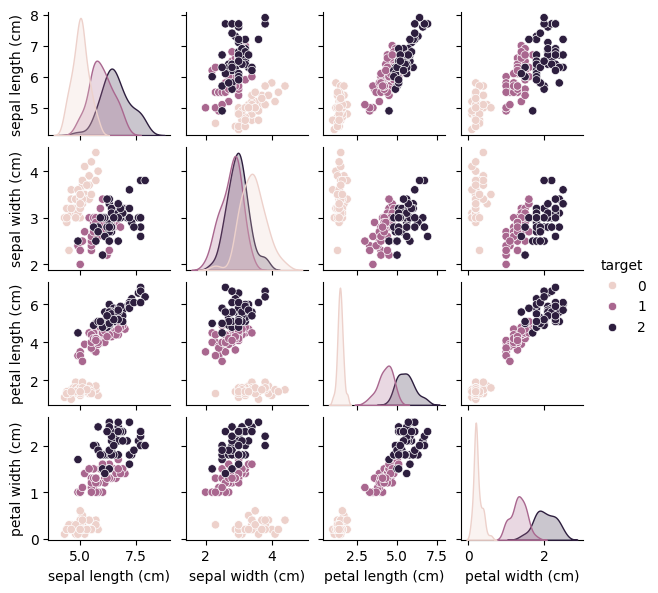

In [36]:
sns.pairplot(iris_df, hue='target', size=1.5)

# train_test_split()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
(iris_train_ftrs, iris_test_ftrs, iris_train_tgt, iris_test_tgt) = train_test_split(iris.data, iris.target, test_size=.25)


In [39]:
print(iris_train_ftrs.shape)
print(iris_test_ftrs.shape)

(112, 4)
(38, 4)


# Točan i netočan odgovor

In [40]:
from sklearn import metrics

In [46]:
tocni = np.array([True, True, False, True])
student = np.array([True, True, True, True])
ispravno = tocni == student
print(ispravno)
brojcano = ispravno.sum()
print(brojcano)
print(brojcano/len(tocni))

[ True  True False  True]
3
0.75


In [48]:
print(metrics.accuracy_score(tocni, student))
## mi ćemo ovu koristiti umjesto print(brojcano/len(tocni)) zbog bolje optimizacije u memoriji

0.75


# Model

In [49]:
iris = datasets.load_iris()
(iris_train_ftrs, iris_test_ftrs, iris_train_tgt, iris_test_tgt) = train_test_split(iris.data, iris.target, test_size=.25)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt) # fit == treniraj
predictions = fit.predict(iris_test_ftrs)
print(metrics.accuracy_score(iris_test_tgt, predictions))

0.9736842105263158
